In [61]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow
from skimage.exposure import cumulative_distribution
from scipy.fft import fft2, ifft2, fftshift, ifftshift
import scipy as sc
from scipy import signal
from skimage.exposure import match_histograms
import math

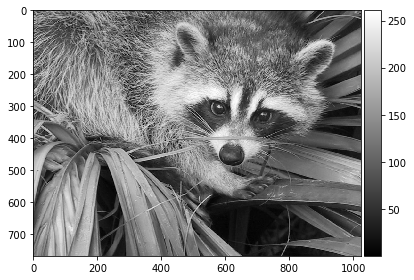

In [18]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

img = rgb2gray(imread('Images-lab2/face.png'))
imshow(img,cmap='gray')

In [79]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation

    kernel = np.flipud(np.fliplr(kernel))


    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

[[  0.      0.      0.    ...   0.      0.      0.   ]
 [  0.      0.      0.    ...   0.      0.      0.   ]
 [  0.      0.    120.787 ... 139.049   0.      0.   ]
 ...
 [  0.      0.     95.358 ... 138.928   0.      0.   ]
 [  0.      0.      0.    ...   0.      0.      0.   ]
 [  0.      0.      0.    ...   0.      0.      0.   ]]


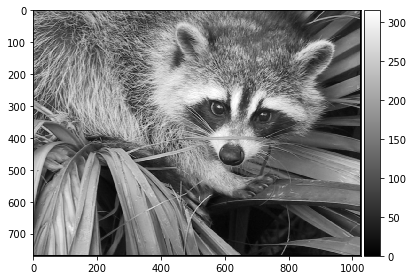

In [55]:
kernel = np.array([[1, 1, 1], [2, 2, 1], [1, 1, 1]])*(1/9)
output = convolve2D(img, kernel, padding=2)
imshow(output,cmap='gray')

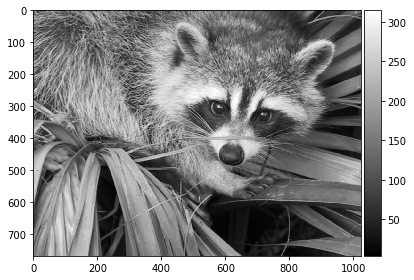

In [56]:
#imshow(signal.correlate2d(img,kernel,'same'),cmap='gray')
a = signal.convolve2d(img,kernel,'same')
imshow(np.absolute(a),cmap='gray')


In [75]:
def gaussian2DFilter(size,sigma):
    gausskernel = np.zeros((size,size),np.float32)
    for i in range (size):
        for j in range (size):
            norm = math.pow(i-1,2) + math.pow(j-1,2)
            gausskernel[i,j] = math.exp(-norm/(2*math.pow(sigma,2)))/2*math.pi*pow(sigma,2)
    sum = np.sum(gausskernel)
    kernel = gausskernel/sum
    return kernel

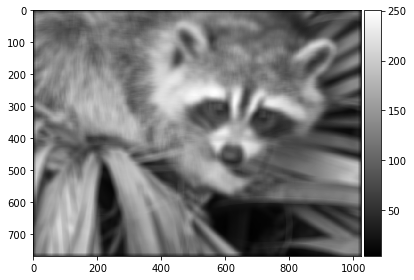

In [85]:
n=gaussian2DFilter(21,1000)
h = signal.convolve2d(img,n,'same')
imshow(h,cmap='gray')